<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: **SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Joaquín De Groote
- Nombre de alumno 2: Vicente Pinochet R.

### **Link de repositorio de GitHub:** [Insertar Enlace](https://github.com/Qajirr/MDS7202-Labs)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [7]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [1]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

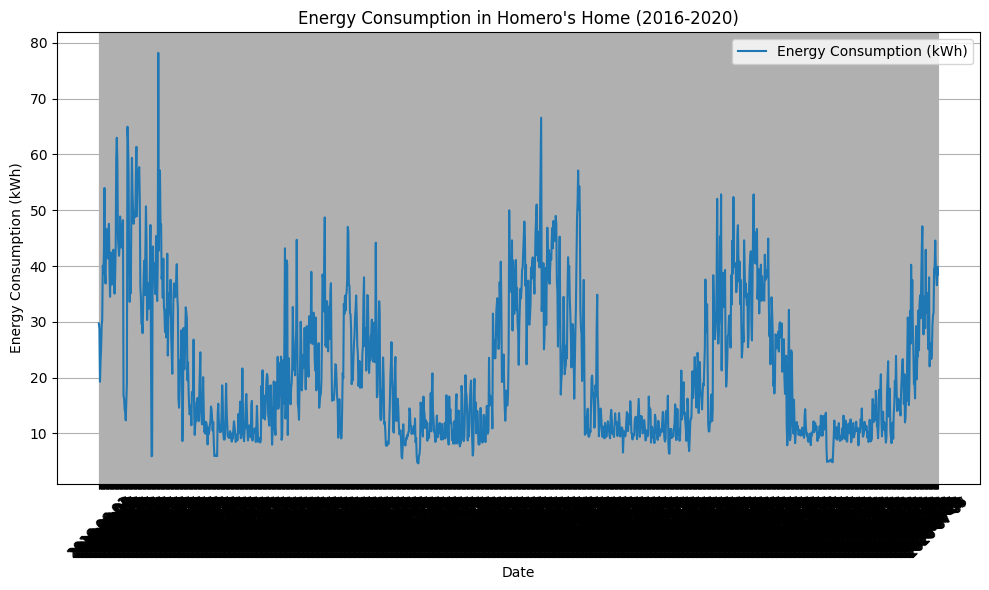

In [11]:
#Codigo Aqui
import pandas as pd

file_path = r"C:\Users\joaqu\Downloads\MDS7202-Labs\MDS7202-Labs-18\Lab 8 - Forecasting\energia_homero.csv"
energy_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
energy_data.head()
# Retry the visualization using matplotlib instead of plotly due to connection issue
import matplotlib.pyplot as plt

# Plot the energy consumption
plt.figure(figsize=(10,6))
plt.plot(energy_data['date'], energy_data['Energy_kWh'], label='Energy Consumption (kWh)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption in Homero\'s Home (2016-2020)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np


# Define the cutoff date for training and testing
cutoff_date = '2020-02-29'

# Split the data into training and testing sets
train_data = energy_data[energy_data['date'] <= cutoff_date]
test_data = energy_data[energy_data['date'] > cutoff_date]
# Ensure the 'date' column is in the correct datetime format for both train and test datasets
train_data['date'] = pd.to_datetime(train_data['date'], errors='coerce')
test_data['date'] = pd.to_datetime(test_data['date'], errors='coerce')

# Verify if there are any missing values or incorrect conversions
train_data.dtypes, test_data.dtypes

# Let's confirm the sizes of both sets
train_size = train_data.shape[0]
test_size = test_data.shape[0]

train_size, test_size



C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\612746112.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['date'] = pd.to_datetime(train_data['date'], errors='coerce')
C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\612746112.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['date'] = pd.to_datetime(test_data['date'], errors='coerce')


(1369, 129)

In [13]:
# Create a function to add time features (like day index)
def create_time_features(df):
    df['day_index'] = (df['date'] - df['date'].min()).dt.days
    return df

# Apply the function to both training and testing data
train_data = create_time_features(train_data)
test_data = create_time_features(test_data)

# Define the pipeline for modeling the trend using a linear model
Pipeline_trend = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('linear_model', LinearRegression())  # Linear regression model
])

# Train the model using the training data
Pipeline_trend.fit(train_data[['day_index']], train_data['Energy_kWh'])

# Predict on both the training and test sets
train_predictions = Pipeline_trend.predict(train_data[['day_index']])
test_predictions = Pipeline_trend.predict(test_data[['day_index']])

# Calculate the Mean Absolute Error (MAE) for both the training and test sets
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train_data['Energy_kWh'], train_predictions)
test_mae = mean_absolute_error(test_data['Energy_kWh'], test_predictions)

train_mae, test_mae

C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\1713604079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_index'] = (df['date'] - df['date'].min()).dt.days
C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\1713604079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_index'] = (df['date'] - df['date'].min()).dt.days


(10.568154088025606, 9.927510004809234)

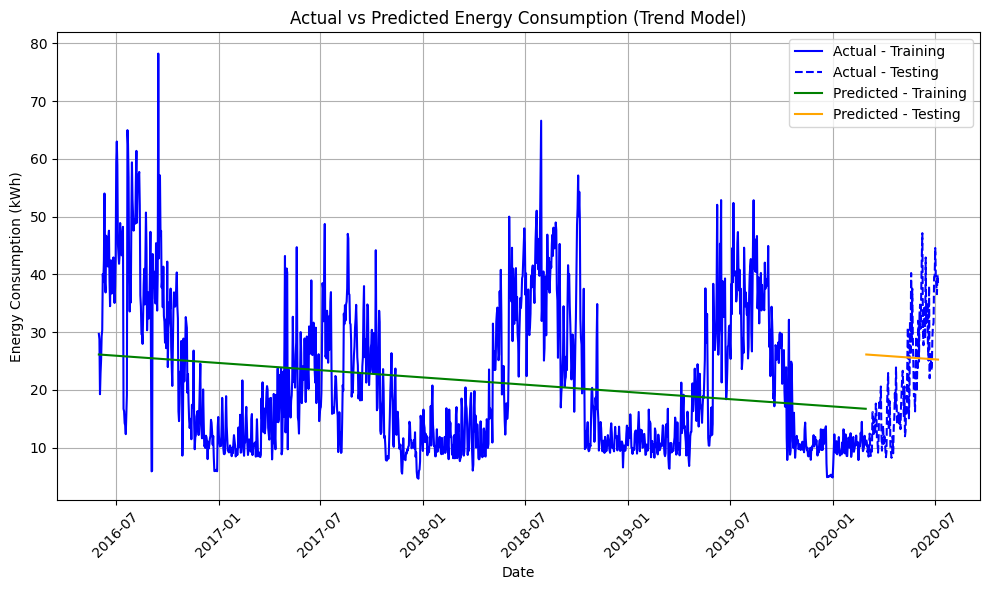

C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\966885538.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['error'] = train_data['Energy_kWh'] - train_predictions
C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\966885538.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['error'] = test_data['Energy_kWh'] - test_predictions


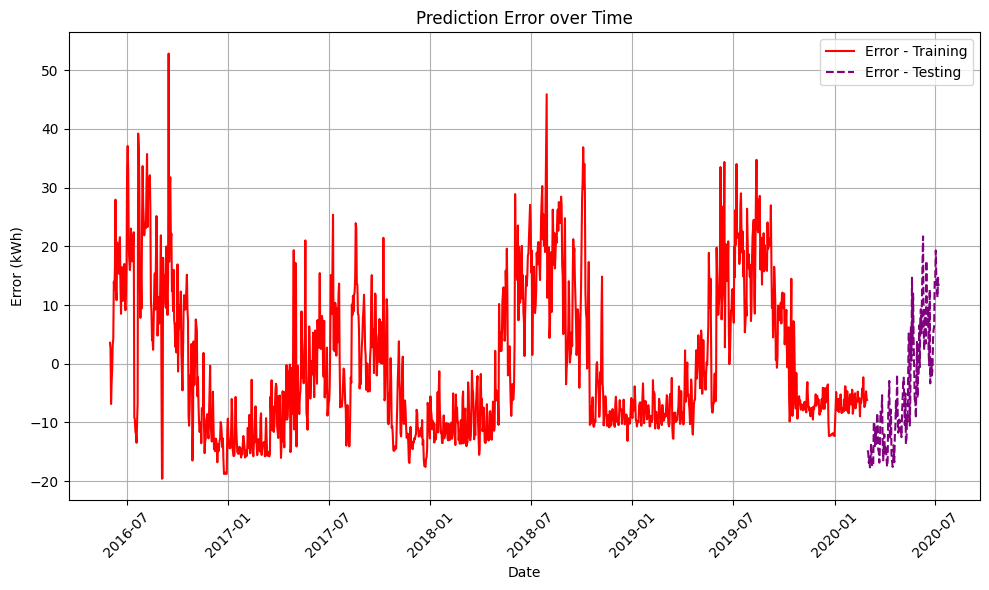

In [14]:
# Correct the plotting code and generate the graphs
plt.figure(figsize=(10,6))

# Plot actual values for both training and testing sets
plt.plot(train_data['date'], train_data['Energy_kWh'], label='Actual - Training', color='blue')
plt.plot(test_data['date'], test_data['Energy_kWh'], label='Actual - Testing', color='blue', linestyle='dashed')

# Plot predicted values for both training and testing sets
plt.plot(train_data['date'], train_predictions, label='Predicted - Training', color='green')
plt.plot(test_data['date'], test_predictions, label='Predicted - Testing', color='orange')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Actual vs Predicted Energy Consumption (Trend Model)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Now let's plot the error (actual - predicted) for the entire time range
train_data['error'] = train_data['Energy_kWh'] - train_predictions
test_data['error'] = test_data['Energy_kWh'] - test_predictions

plt.figure(figsize=(10,6))
plt.plot(train_data['date'], train_data['error'], label='Error - Training', color='red')
plt.plot(test_data['date'], test_data['error'], label='Error - Testing', color='purple', linestyle='dashed')

# Customize the error plot
plt.xlabel('Date')
plt.ylabel('Error (kWh)')
plt.title('Prediction Error over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the error plot
plt.show()


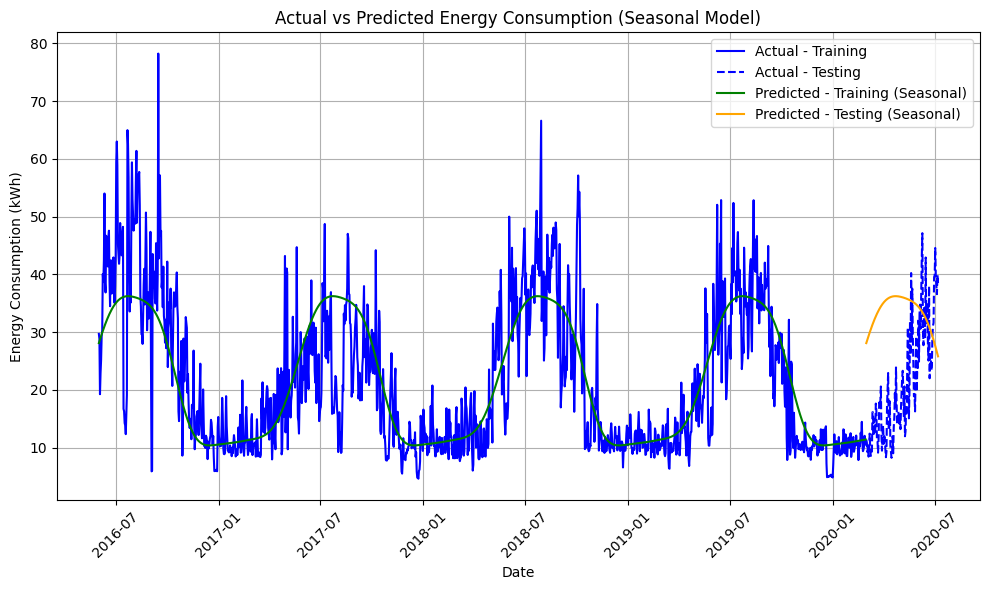

C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\2986891353.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['error_seasonal'] = train_data['Energy_kWh'] - train_predictions_seasonal
C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\2986891353.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['error_seasonal'] = test_data['Energy_kWh'] - test_predictions_seasonal


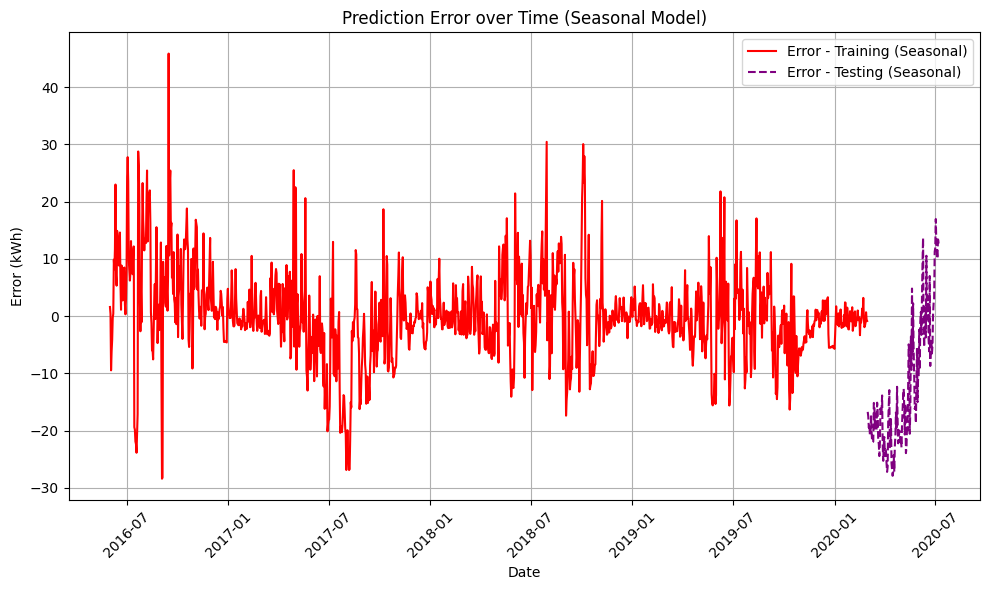

In [15]:
from sklearn.preprocessing import FunctionTransformer

# Define a function to create Fourier terms for seasonality
def create_fourier_terms(df, period=365.25, order=5):
    """Create Fourier terms for capturing seasonality."""
    day_index = df['day_index'].values
    terms = []
    for k in range(1, order + 1):
        terms.append(np.sin(2 * np.pi * k * day_index / period))
        terms.append(np.cos(2 * np.pi * k * day_index / period))
    return np.column_stack(terms)

# Create a pipeline to capture seasonality using Fourier terms
Pipeline_seasonal = Pipeline([
    ('fourier', FunctionTransformer(create_fourier_terms, kw_args={'period': 365.25, 'order': 5})),
    ('linear_model', LinearRegression())
])

# Train the seasonal model on the training data
Pipeline_seasonal.fit(train_data[['day_index']], train_data['Energy_kWh'])

# Get predictions for both training and test sets
train_predictions_seasonal = Pipeline_seasonal.predict(train_data[['day_index']])
test_predictions_seasonal = Pipeline_seasonal.predict(test_data[['day_index']])

# Calculate MAE for the seasonal model
train_mae_seasonal = mean_absolute_error(train_data['Energy_kWh'], train_predictions_seasonal)
test_mae_seasonal = mean_absolute_error(test_data['Energy_kWh'], test_predictions_seasonal)

train_mae_seasonal, test_mae_seasonal
# Plot actual vs predicted values for the seasonal model
plt.figure(figsize=(10,6))

# Plot actual values
plt.plot(train_data['date'], train_data['Energy_kWh'], label='Actual - Training', color='blue')
plt.plot(test_data['date'], test_data['Energy_kWh'], label='Actual - Testing', color='blue', linestyle='dashed')

# Plot seasonal model predictions
plt.plot(train_data['date'], train_predictions_seasonal, label='Predicted - Training (Seasonal)', color='green')
plt.plot(test_data['date'], test_predictions_seasonal, label='Predicted - Testing (Seasonal)', color='orange')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Actual vs Predicted Energy Consumption (Seasonal Model)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Now, plot the error (actual - predicted) for the seasonal model
train_data['error_seasonal'] = train_data['Energy_kWh'] - train_predictions_seasonal
test_data['error_seasonal'] = test_data['Energy_kWh'] - test_predictions_seasonal

plt.figure(figsize=(10,6))
plt.plot(train_data['date'], train_data['error_seasonal'], label='Error - Training (Seasonal)', color='red')
plt.plot(test_data['date'], test_data['error_seasonal'], label='Error - Testing (Seasonal)', color='purple', linestyle='dashed')

# Customize the error plot
plt.xlabel('Date')
plt.ylabel('Error (kWh)')
plt.title('Prediction Error over Time (Seasonal Model)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the error plot
plt.show()



## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [17]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

17:23:41 - cmdstanpy - INFO - Chain [1] start processing
17:23:41 - cmdstanpy - INFO - Chain [1] done processing


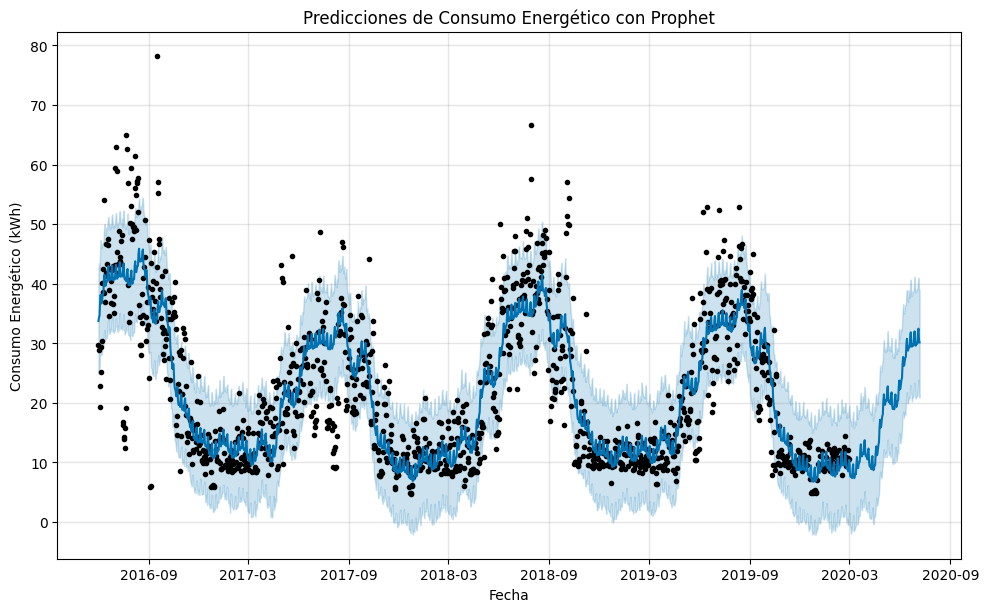

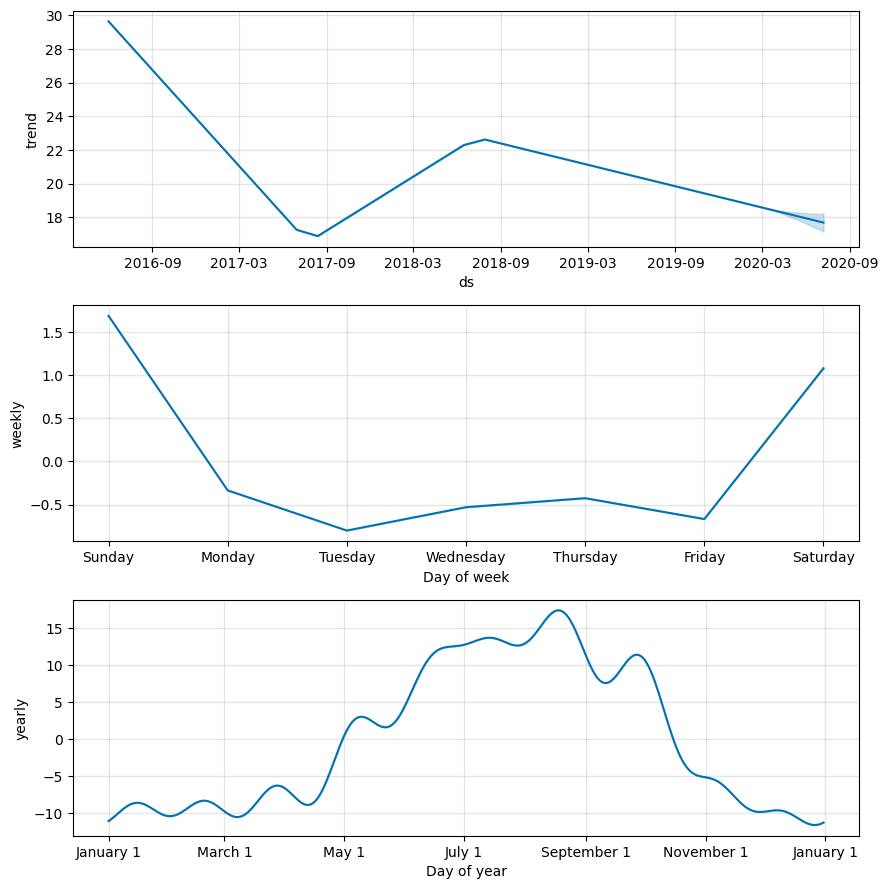

MAE en el conjunto de entrenamiento: 4.820456421417843
MAE en el conjunto de prueba: 4.934029048086043


C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\3124822242.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['error_prophet'] = train_data['Energy_kWh'] - train_predictions.values
C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\3124822242.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['error_prophet'] = test_data['Energy_kWh'] - test_predictions.values


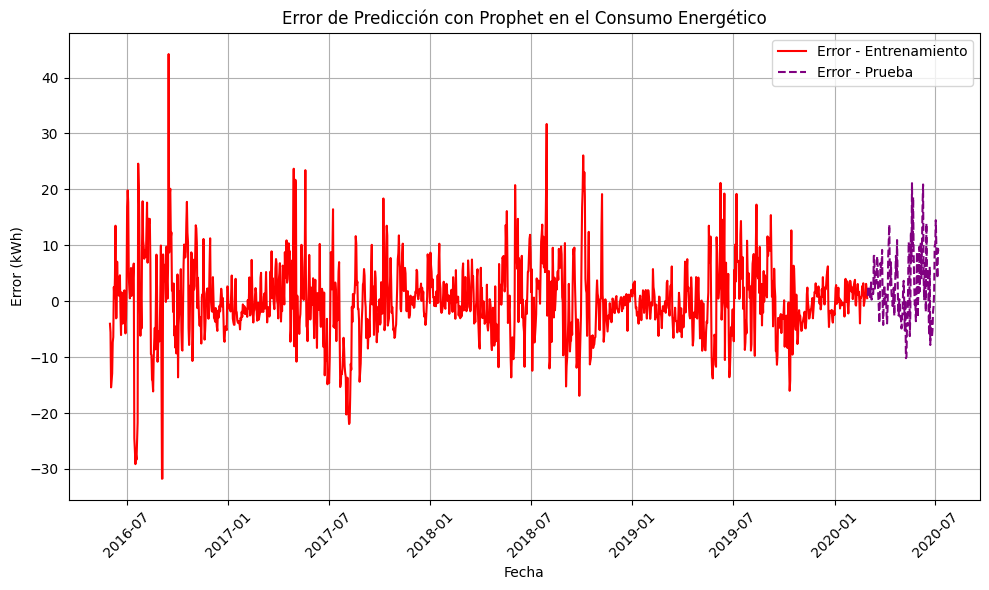

In [18]:
#CODIGO AQUI
# Renombrar columnas para Prophet
train_data_prophet = train_data[['date', 'Energy_kWh']].rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test_data_prophet = test_data[['date', 'Energy_kWh']].rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

# Crear y ajustar el modelo Prophet
model = Prophet()
model.fit(train_data_prophet)

# Crear un DataFrame de fechas futuras (incluye el conjunto de prueba)
future = model.make_future_dataframe(periods=len(test_data), freq='D')

# Realizar predicciones
forecast = model.predict(future)

# Graficar las predicciones
fig = model.plot(forecast)
plt.title('Predicciones de Consumo Energético con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Consumo Energético (kWh)')
plt.show()

# Graficar las componentes del modelo Prophet
fig2 = model.plot_components(forecast)
plt.show()

# Calcular el MAE para el conjunto de entrenamiento y prueba
train_predictions = forecast[forecast['ds'] <= cutoff_date]['yhat']
test_predictions = forecast[forecast['ds'] > cutoff_date]['yhat']

train_mae = mean_absolute_error(train_data_prophet['y'], train_predictions)
test_mae = mean_absolute_error(test_data_prophet['y'], test_predictions)

print(f'MAE en el conjunto de entrenamiento: {train_mae}')
print(f'MAE en el conjunto de prueba: {test_mae}')

# Graficar el error (Valor real - Valor predicho) para todo el intervalo de tiempo
train_data['error_prophet'] = train_data['Energy_kWh'] - train_predictions.values
test_data['error_prophet'] = test_data['Energy_kWh'] - test_predictions.values

plt.figure(figsize=(10,6))
plt.plot(train_data['date'], train_data['error_prophet'], label='Error - Entrenamiento', color='red')
plt.plot(test_data['date'], test_data['error_prophet'], label='Error - Prueba', color='purple', linestyle='dashed')
plt.title('Error de Predicción con Prophet en el Consumo Energético')
plt.xlabel('Fecha')
plt.ylabel('Error (kWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [25]:
#CODIGO AQUI
# Merge the weather data with the energy consumption data on the 'date' column for both train and test datasets
# First, ensure the 'date' column in weather_data is of datetime type
weather_data_path = r"C:\Users\joaqu\Downloads\MDS7202-Labs\MDS7202-Labs-18\Lab 8 - Forecasting\datos_frink.csv"
weather_data = pd.read_csv(weather_data_path)


weather_data['date'] = pd.to_datetime(weather_data['date'])

# Merge the weather data with the training and testing sets
train_data_merged = pd.merge(train_data, weather_data, on='date', how='left')
test_data_merged = pd.merge(test_data, weather_data, on='date', how='left')

# Check the merged data to confirm the merge was successful
train_data_merged.head()


,date,Energy_kWh,day_index,error,error_seasonal,error_prophet,Temp_max,Temp_avg,Temp_min,Dew_max,...,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min
0,2016-06-01,29.691,0,3.570054,1.596811,-4.037054,85,74.8,68,74,...,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7
1,2016-06-02,28.789,1,2.674925,0.382975,-5.569983,76,71.2,66,74,...,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7
2,2016-06-03,19.247,2,-6.860204,-9.467312,-15.417125,79,72.1,68,72,...,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7
3,2016-06-04,22.883,3,-3.217333,-6.135765,-14.081912,76,71.2,69,73,...,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7
4,2016-06-05,25.195,4,-0.898462,-4.124107,-12.935464,82,73.8,68,72,...,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7


In [26]:
# Merge the weather data with the energy consumption data on the 'date' column for both train and test datasets
# First, ensure the 'date' column in weather_data is of datetime type
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Merge the weather data with the training and testing sets
train_data_merged = pd.merge(train_data, weather_data, on='date', how='left')
test_data_merged = pd.merge(test_data, weather_data, on='date', how='left')

# Check the merged data to confirm the merge was successful
train_data_merged.head()
# Rename columns for Prophet and select relevant weather regressors
train_data_prophet_merged = train_data_merged.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test_data_prophet_merged = test_data_merged.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

# Initialize the Prophet model
model_with_regressors = Prophet()

# Add relevant regressors (e.g., average temperature and humidity)
model_with_regressors.add_regressor('Temp_avg')
model_with_regressors.add_regressor('Hum_avg')

# Train the model on the training set with the regressors
model_with_regressors.fit(train_data_prophet_merged[['ds', 'y', 'Temp_avg', 'Hum_avg']])

# Create a future dataframe for the prediction period (including the test set dates)
future_with_regressors = model_with_regressors.make_future_dataframe(periods=len(test_data_merged), freq='D')

# Add the weather variables to the future dataframe
future_with_regressors = pd.merge(future_with_regressors, weather_data[['date', 'Temp_avg', 'Hum_avg']].rename(columns={'date': 'ds'}), on='ds', how='left')

# Make predictions
forecast_with_regressors = model_with_regressors.predict(future_with_regressors)

# Display forecast results
forecast_with_regressors[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


17:29:06 - cmdstanpy - INFO - Chain [1] start processing
17:29:06 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1493,2020-07-03,30.119600,21.293042,38.568883
1494,2020-07-04,31.807681,22.877285,39.968880
1495,2020-07-05,32.926026,24.595671,40.937794
1496,2020-07-06,30.523664,22.618790,40.011203
1497,2020-07-07,29.313642,20.740205,37.345301


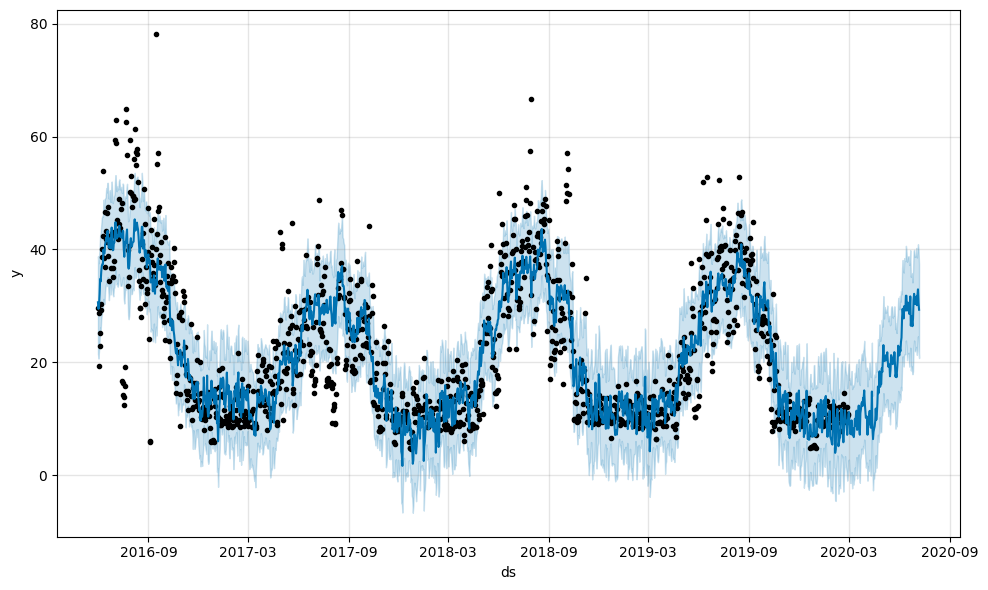

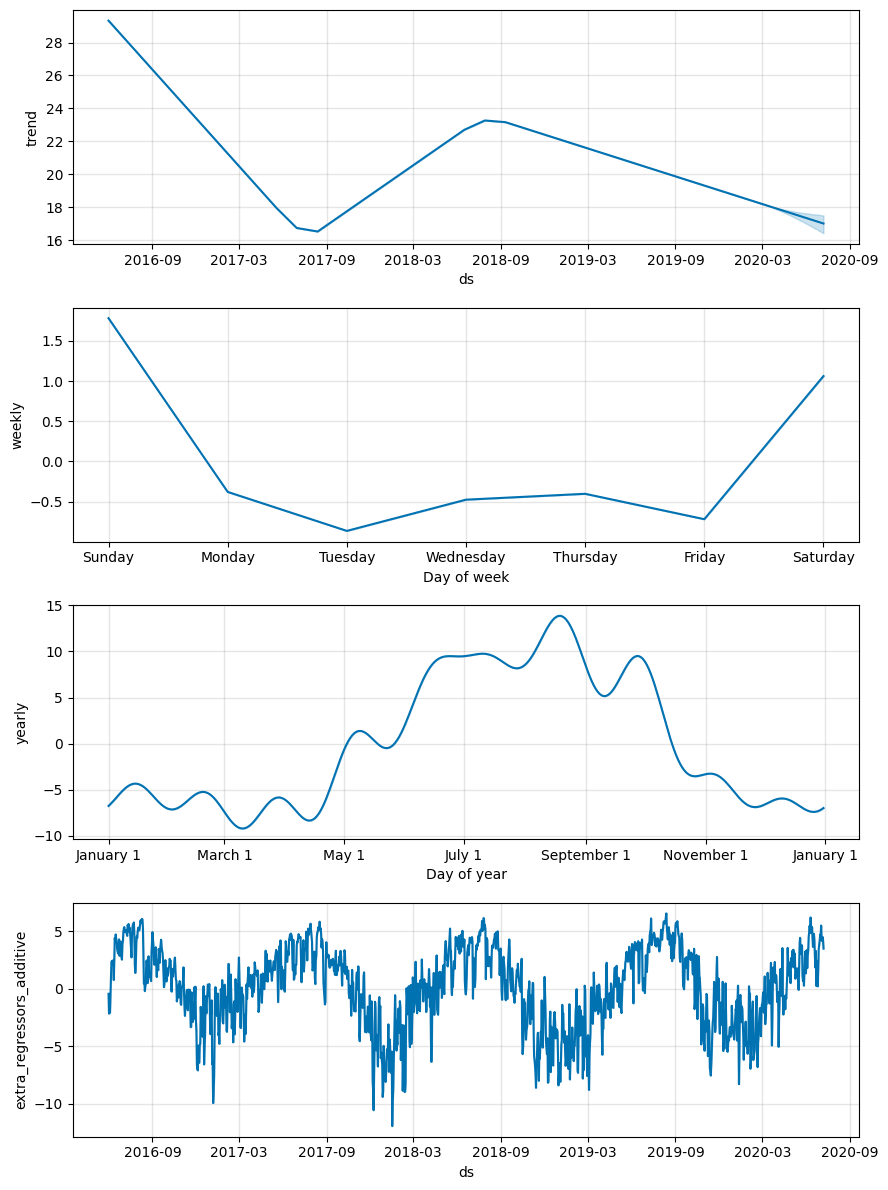

MAE en el conjunto de entrenamiento: 4.755714590257873
MAE en el conjunto de prueba: 4.55015125442978


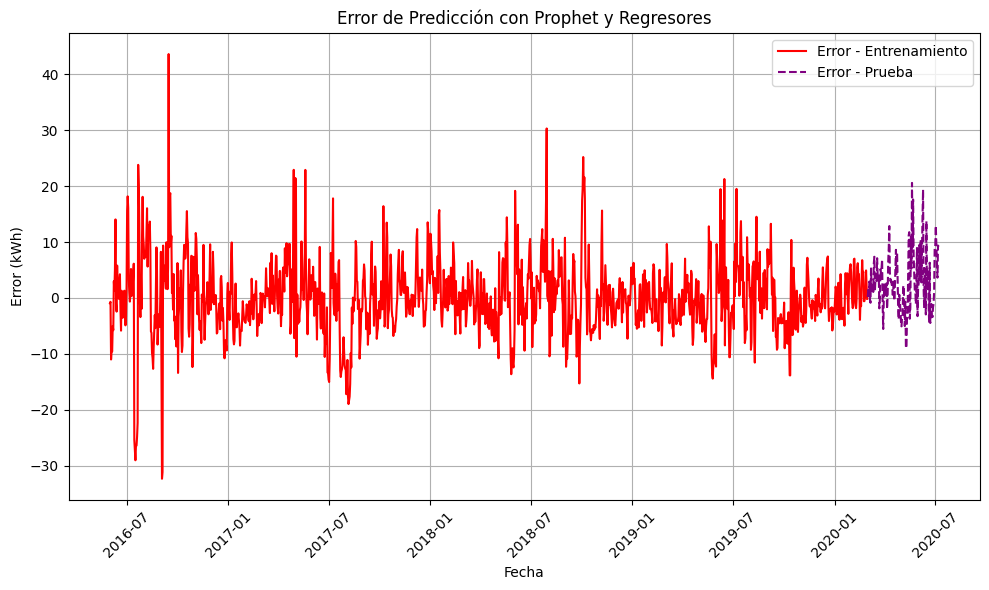

In [36]:
# Graficar las predicciones
model_with_regressors.plot(forecast_with_regressors)
plt.show()

# Graficar las componentes del modelo
model_with_regressors.plot_components(forecast_with_regressors)
plt.show()

# Calcular MAE
train_mae = mean_absolute_error(train_data_prophet['y'], forecast_with_regressors[forecast_with_regressors['ds'] <= cutoff_date]['yhat'])
test_mae = mean_absolute_error(test_data_prophet['y'], forecast_with_regressors[forecast_with_regressors['ds'] > cutoff_date]['yhat'])

print(f'MAE en el conjunto de entrenamiento: {train_mae}')
print(f'MAE en el conjunto de prueba: {test_mae}')

# Graficar el error (valor real - valor predicho)
train_data_prophet['error'] = train_data_prophet['y'] - forecast_with_regressors[forecast_with_regressors['ds'] <= cutoff_date]['yhat'].values
test_data_prophet['error'] = test_data_prophet['y'] - forecast_with_regressors[forecast_with_regressors['ds'] > cutoff_date]['yhat'].values

plt.figure(figsize=(10,6))
plt.plot(train_data_prophet['ds'], train_data_prophet['error'], label='Error - Entrenamiento', color='red')
plt.plot(test_data_prophet['ds'], test_data_prophet['error'], label='Error - Prueba', color='purple', linestyle='dashed')
plt.title('Error de Predicción con Prophet y Regresores')
plt.xlabel('Fecha')
plt.ylabel('Error (kWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

<Figure size 800x600 with 0 Axes>

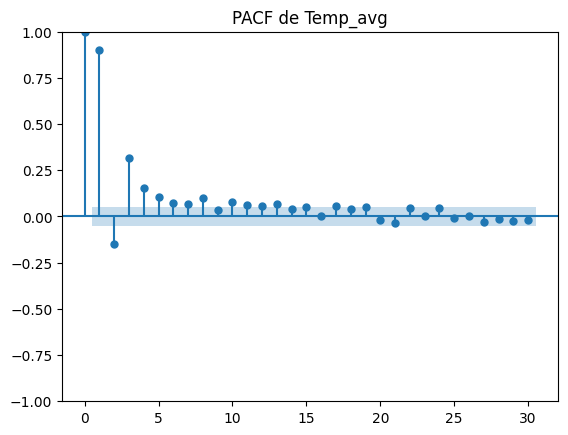

<Figure size 800x600 with 0 Axes>

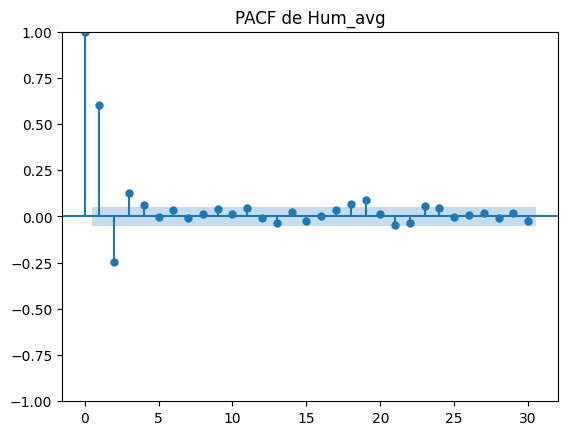

In [53]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Calcular la PACF para Temp_avg
plt.figure(figsize=(8,6))
plot_pacf(train_data_merged['Temp_avg'].dropna(), lags=30, method='ywm', title='PACF de Temp_avg')
plt.show()

# Calcular la PACF para Hum_avg
plt.figure(figsize=(8,6))
plot_pacf(train_data_merged['Hum_avg'].dropna(), lags=30, method='ywm', title='PACF de Hum_avg')
plt.show()



In [54]:
# Definir una función para agregar lags a las variables
def create_lags(df, column, lags):
    for lag in range(1, lags + 1):
        df[f'{column}_lag{lag}'] = df[column].shift(lag)
    return df

# Aplicar lags a las variables Temp_avg y Hum_avg (supongamos que se determinan 3 lags)
train_data_lagged = create_lags(train_data_merged, 'Temp_avg', 3)
train_data_lagged = create_lags(train_data_lagged, 'Hum_avg', 3)

test_data_lagged = create_lags(test_data_merged, 'Temp_avg', 3)
test_data_lagged = create_lags(test_data_lagged, 'Hum_avg', 3)



In [56]:
# Imputar los valores nulos de las columnas lag con la media de la columna
train_data_lagged.fillna(train_data_lagged.mean(), inplace=True)
test_data_lagged.fillna(test_data_lagged.mean(), inplace=True)

# Renombrar columnas para Prophet
train_data_prophet_lagged = train_data_lagged.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
test_data_prophet_lagged = test_data_lagged.rename(columns={'date': 'ds', 'Energy_KWh': 'y'})

# Crear el modelo Prophet
model_with_lags = Prophet()

# Incluir las variables exógenas y sus lags
model_with_lags.add_regressor('Temp_avg')
model_with_lags.add_regressor('Hum_avg')
model_with_lags.add_regressor('Temp_avg_lag1')
model_with_lags.add_regressor('Temp_avg_lag2')
model_with_lags.add_regressor('Temp_avg_lag3')
model_with_lags.add_regressor('Hum_avg_lag1')
model_with_lags.add_regressor('Hum_avg_lag2')
model_with_lags.add_regressor('Hum_avg_lag3')

# Entrenar el modelo
model_with_lags.fit(train_data_prophet_lagged[['ds', 'y', 'Temp_avg', 'Hum_avg', 
                                               'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 
                                               'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_avg_lag3']])


C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\2132449030.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  train_data_lagged.fillna(train_data_lagged.mean(), inplace=True)
C:\Users\joaqu\AppData\Local\Temp\ipykernel_16084\2132449030.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test_data_lagged.fillna(test_data_lagged.mean(), inplace=True)
17:51:42 - cmdstanpy - INFO - Chain [1] start processing
17:51:42 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
# Crear DataFrame futuro
future_with_lags = model_with_lags.make_future_dataframe(periods=len(test_data_lagged), freq='D')

# Agregar las variables exógenas al DataFrame futuro
future_with_lags = pd.merge(future_with_lags, test_data_lagged[['ds', 'Temp_avg', 'Hum_avg', 
                                                                'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 
                                                                'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_avg_lag3']],
                            on='ds', how='left')

# Realizar predicciones
forecast_with_lags = model_with_lags.predict(future_with_lags)

# Graficar las predicciones
model_with_lags.plot(forecast_with_lags)
plt.show()

# Graficar componentes
model_with_lags.plot_components(forecast_with_lags)
plt.show()


KeyError: "['ds'] not in index"

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [15]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [16]:
#CODIGO AQUI

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [17]:
#!pip install surprise

In [18]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [19]:
#CODIGO AQUI
# Cargar el dataset
df = pd.read_csv('cervezas.csv')

# Exploración rápida de los datos
print("Primeras filas del dataset:")
print(df.head())

# Revisión de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Cantidad de cervezas evaluadas
cervezas_unicas = df['beerId'].nunique()
print(f"\nCantidad de cervezas evaluadas: {cervezas_unicas}")

# Cantidad de ciudadanos que participaron
ciudadanos_unicos = df['userId'].nunique()
print(f"Cantidad de ciudadanos que participaron: {ciudadanos_unicos}")

Primeras filas del dataset:
   userId  beerId  rating                            beerName  \
0     144     995     3.0                            Mai Bock   
1      63   58695     4.0  Hop In The Dark Cascadian Dark Ale   
2     147    4083     5.0                 Stone Ruination IPA   
3    4261   40310     3.0                     Noël Des Géants   
4     140    1904     5.0       Sierra Nevada Celebration Ale   

                        beerStyle  
0           Maibock / Helles Bock  
1              American Black Ale  
2  American Double / Imperial IPA  
3            Herbed / Spiced Beer  
4                    American IPA  

Valores nulos por columna:
userId       0
beerId       0
rating       0
beerName     0
beerStyle    0
dtype: int64

Cantidad de cervezas evaluadas: 3747
Cantidad de ciudadanos que participaron: 706


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [20]:
# 1. Estadísticas descriptivas

# Cantidad de usuarios
usuarios_unicos = df['userId'].nunique()
print(f"Cantidad de usuarios: {usuarios_unicos}")

# Cantidad de productos (cervezas)
productos_unicos = df['beerId'].nunique()
print(f"Cantidad de productos (cervezas): {productos_unicos}")

# Cantidad de calificaciones
calificaciones_totales = df['rating'].count()
print(f"Cantidad de calificaciones: {calificaciones_totales}")

# Cantidad de calificaciones faltantes
calificaciones_faltantes = df['rating'].isnull().sum()
print(f"Cantidad de calificaciones faltantes: {calificaciones_faltantes}")

# Media de las calificaciones por usuario
media_por_usuario = df.groupby('userId')['rating'].mean()
print(f"\nMedia de las calificaciones por usuario:\n{media_por_usuario.describe()}")

# Media de las calificaciones por producto (cerveza)
media_por_producto = df.groupby('beerId')['rating'].mean()
print(f"\nMedia de las calificaciones por producto (cerveza):\n{media_por_producto.sort_values(ascending=False).describe()}")

# Gráficos de distribuciones
fig = px.histogram(media_por_usuario, nbins=30, title="Distribución de la Media de Calificaciones por Usuario",
                   labels={'value': 'Media de Calificaciones'}, template='plotly_dark')
fig.show()

# Graficar histogramas de las 5 primeras beerId
for beer_id in df['beerId'].unique()[:5]:
    fig = px.histogram(df[df['beerId'] == beer_id], x='rating', nbins=30, title=f"Distribución de Calificaciones para la Cerveza ID {beer_id}",
                       labels={'rating': 'Calificación'}, template='plotly_dark')
    fig.show()

# 2. Matriz (usuario, producto)

# Pivotamos el DataFrame para crear la matriz (usuario, producto)
matriz_usuario_producto = df.pivot_table(index='userId', columns='beerId', values='rating')

print("\nMatriz de usuario-producto:")
print(matriz_usuario_producto)

Cantidad de usuarios: 706
Cantidad de productos (cervezas): 3747
Cantidad de calificaciones: 295059
Cantidad de calificaciones faltantes: 0

Media de las calificaciones por usuario:
count    706.000000
mean       3.733511
std        0.385318
min        1.437500
25%        3.579022
50%        3.808647
75%        3.988206
max        4.639706
Name: rating, dtype: float64

Media de las calificaciones por producto (cerveza):
count    3747.000000
mean        3.786074
std         0.359536
min         1.376923
25%         3.633740
50%         3.838710
75%         4.021680
max         4.669492
Name: rating, dtype: float64



Matriz de usuario-producto:
beerId  5         6         7         9         10        11        14     \
userId                                                                      
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       3.395  3.765217  3.256849  3.478261       NaN       NaN       NaN   
4         NaN       NaN       NaN       NaN  3.791908       NaN       NaN   
5         NaN       NaN       NaN       NaN       NaN  3.431818       NaN   
6         NaN       NaN       NaN       NaN       NaN       NaN  3.892157   
...       ...       ...       ...       ...       ...       ...       ...   
24903     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
25317     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
25923     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
27039     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
27681     NaN       NaN       NaN       NaN    

**Media de las calificaciones entregadas por los usuarios:**

- **3.73** (rango: 1.44 - 4.64).

**¿Cómo cambia esto a través de los productos?**

- La media por producto es **3.79**
- Los productos tienden a recibir mejores calificaciones que la media por usuario.
- Las distribuciones observadas muestran que la mayoría de los productos tienen medias entre **3.5 y 4.5**, lo que indica una valoración generalmente positiva de las cervezas en Springfield.


## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [21]:
#CODIGO AQUI
# Dataframe solo con las características de las cervezas, eliminando duplicados
df_cervezas = df[['beerId', 'beerName', 'beerStyle']].drop_duplicates()
print(df_cervezas.head())

   beerId                            beerName                       beerStyle
0     995                            Mai Bock           Maibock / Helles Bock
1   58695  Hop In The Dark Cascadian Dark Ale              American Black Ale
2    4083                 Stone Ruination IPA  American Double / Imperial IPA
3   40310                     Noël Des Géants            Herbed / Spiced Beer
4    1904       Sierra Nevada Celebration Ale                    American IPA


In [22]:
# Inicializar CountVectorizer
vectorizer = CountVectorizer(lowercase=True,  # convertir a minúsculas
                             min_df=10,       # palabras que aparezcan en al menos 10 documentos
                             stop_words='english')  # eliminar stopwords en inglés

# Vectorizar la columna 'beerStyle'
bow = vectorizer.fit_transform(df_cervezas['beerStyle']).toarray()

# Convertir a DataFrame y agregar nombres de las características
bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
print(bow_df.head())

   adjunct  ale  altbier  amber  american  apa  baltic  barleywine  beer  \
0        0    0        0      0         0    0       0           0     0   
1        0    1        0      0         1    0       0           0     0   
2        0    0        0      0         1    0       0           0     0   
3        0    0        0      0         0    0       0           0     1   
4        0    0        0      0         1    0       0           0     0   

   belgian  ...  vienna  warmer  wee  weizenbock  wheat  wheatwine  wild  \
0        0  ...       0       0    0           0      0          0     0   
1        0  ...       0       0    0           0      0          0     0   
2        0  ...       0       0    0           0      0          0     0   
3        0  ...       0       0    0           0      0          0     0   
4        0  ...       0       0    0           0      0          0     0   

   winter  witbier  zwickel  
0       0        0        0  
1       0        0        

In [23]:
df_cervezas = df_cervezas.reset_index(drop=True)
# Función para obtener las top 5 cervezas similares a una cerveza dada
def get_similar_cervezas(df, beer_name, n=5):
    # Obtener el índice de la cerveza objetivo
    beer_idx = df[df['beerName'] == beer_name].index[0]
    
    # Calcular la similitud coseno
    cosine_sim = cosine_similarity(bow)
    
    # Obtener los índices de las cervezas más similares
    sim_scores = list(enumerate(cosine_sim[beer_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # ordenar por similitud
    sim_scores = sim_scores[1:n+1]  # obtener las top 5 similares
    print(sim_scores)
    # Imprimir las top 5 cervezas similares
    for idx, score in sim_scores:
        print(f"Cerveza similar: {df.iloc[idx]['beerName']}")

# Obtener las top 5 cervezas similares a 'Chocolate Porter'
get_similar_cervezas(df_cervezas, 'Chocolate Porter')

[(47, 0.9999999999999998), (140, 0.9999999999999998), (142, 0.9999999999999998), (195, 0.9999999999999998), (197, 0.9999999999999998)]
Cerveza similar: Great Lakes Edmund Fitzgerald Porter
Cerveza similar: Perseus Porter
Cerveza similar: Southampton Imperial Porter
Cerveza similar: Kona Coffee Macadamia Coconut Porter
Cerveza similar: Black Marlin Porter


In [24]:
# Filtrar las cervezas evaluadas por Carl (userId = 100)
calificaciones_carl = df[df['userId'] == 100].sort_values('rating', ascending=False)

# Obtener la cerveza mejor evaluada por Carl
mejor_cerveza_carl = calificaciones_carl.iloc[0]['beerName']
print(f"La cerveza mejor evaluada por Carl (userId = 100) es: {mejor_cerveza_carl}")

# Obtener las top 5 cervezas similares a la cerveza mejor evaluada por Carl
get_similar_cervezas(df_cervezas, mejor_cerveza_carl)

La cerveza mejor evaluada por Carl (userId = 100) es: McNeill's Firehouse Amber Ale
[(112, 1.0), (119, 1.0), (122, 1.0), (207, 1.0), (305, 1.0)]
Cerveza similar: Grail Ale
Cerveza similar: Santa's Private Reserve Ale
Cerveza similar: Hemp Hop Rye Amber Ale
Cerveza similar: Autumn Fest
Cerveza similar: Red Rocket Ale


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [25]:
#CODIGO AQUI
# Cargar el DataFrame
reader = Reader(rating_scale=(1, 5))  # Definir la escala de ratings
df_collaborative = df[['userId', 'beerId', 'rating']].copy()  # Ordenar las columnas necesarias

# Convertir el DataFrame en un Dataset para surprise
dataset = Dataset.load_from_df(df_collaborative, reader)

In [26]:
from surprise.model_selection import train_test_split

# Crear conjuntos de entrenamiento y prueba
trainset, testset = train_test_split(dataset, test_size=0.3, random_state=3380)

In [27]:
# Definir el modelo KNN basado en usuarios
sim_options = {'name': 'cosine', 'user_based': True}  # Basado en usuarios
knn_user = KNNBasic(sim_options=sim_options)

# Entrenar el modelo
knn_user.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_user = knn_user.test(testset)

# Calcular MAE
mae(predictions_user)

# Mostrar las predicciones en un DataFrame
df_predictions_user = pd.DataFrame(predictions_user)
df_predictions_user[['uid', 'iid', 'r_ui', 'est']]

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.4652


,uid,iid,r_ui,est
0,651,52043,3.5,3.807692
1,10099,6260,5.0,3.850000
2,140,37477,4.5,4.112500
3,148,25989,5.0,3.837500
4,1837,5245,4.0,3.966667
...,...,...,...,...
88513,651,6076,4.5,4.250000
88514,143,1352,3.0,3.212500
88515,863,22790,4.5,4.412500
88516,12985,47941,4.0,3.825000


In [28]:
from sklearn.metrics import mean_absolute_error

# Convertir las predicciones a un DataFrame para análisis
df_results_user = pd.DataFrame(predictions_user)

# Calcular MAE
mae_sklearn_user = mean_absolute_error(df_results_user['r_ui'], df_results_user['est'])
print(f"MAE basado en usuarios: {mae_sklearn_user}")

MAE basado en usuarios: 0.46520802143256357


In [29]:
# Definir el modelo KNN basado en productos
sim_options_item = {'name': 'cosine', 'user_based': False}  # Basado en productos
knn_item = KNNBasic(sim_options=sim_options_item)

# Entrenar el modelo
knn_item.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions_item = knn_item.test(testset)

# Calcular MAE para productos
mae(predictions_item)

# Mostrar las predicciones en un DataFrame
df_predictions_item = pd.DataFrame(predictions_item)
df_predictions_item[['uid', 'iid', 'r_ui', 'est']]

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.4652


,uid,iid,r_ui,est
0,651,52043,3.5,4.209859
1,10099,6260,5.0,3.850000
2,140,37477,4.5,4.112500
3,148,25989,5.0,3.837500
4,1837,5245,4.0,3.912769
...,...,...,...,...
88513,651,6076,4.5,4.250000
88514,143,1352,3.0,3.212500
88515,863,22790,4.5,4.412500
88516,12985,47941,4.0,3.825000


In [30]:
# Convertir las predicciones a un DataFrame para análisis
df_results_item = pd.DataFrame(predictions_item)

# Calcular MAE
mae_sklearn_item = mean_absolute_error(df_results_item['r_ui'], df_results_item['est'])
print(f"MAE basado en productos: {mae_sklearn_item}")

MAE basado en productos: 0.46523121163672004


### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [31]:
#CODIGO AQUI
# Modelo NMF
nmf_model = NMF(random_state=3380)

# Entrenar el modelo con el conjunto de entrenamiento
nmf_model.fit(trainset)

# Generar predicciones para el conjunto de prueba
predictions_nmf = nmf_model.test(testset)

In [32]:
# Calcular MAE para el modelo NMF
mae_nmf = mae(predictions_nmf)

df_predictions_nmf = pd.DataFrame(predictions_nmf)
df_predictions_nmf[['uid', 'iid', 'r_ui', 'est']]

MAE:  0.4806


,uid,iid,r_ui,est
0,651,52043,3.5,3.705730
1,10099,6260,5.0,3.919372
2,140,37477,4.5,3.968601
3,148,25989,5.0,3.694468
4,1837,5245,4.0,4.005753
...,...,...,...,...
88513,651,6076,4.5,4.070604
88514,143,1352,3.0,3.314464
88515,863,22790,4.5,4.372749
88516,12985,47941,4.0,3.982615


In [33]:
# Modelo SVD
svd_model = SVD(n_factors=50, n_epochs=25,random_state=3380)

# Entrenar el modelo con el conjunto de entrenamiento
svd_model.fit(trainset)

# Generar predicciones para el conjunto de prueba
predictions_svd = svd_model.test(testset)

In [34]:
# Calcular MAE para el modelo SVD
mae_svd = mae(predictions_svd)

# Mostrar las predicciones
df_predictions_svd = pd.DataFrame(predictions_svd)
df_predictions_svd[['uid', 'iid', 'r_ui', 'est']]

MAE:  0.4627


,uid,iid,r_ui,est
0,651,52043,3.5,3.829089
1,10099,6260,5.0,3.847132
2,140,37477,4.5,4.102531
3,148,25989,5.0,3.880113
4,1837,5245,4.0,3.954557
...,...,...,...,...
88513,651,6076,4.5,4.168937
88514,143,1352,3.0,3.241106
88515,863,22790,4.5,4.326529
88516,12985,47941,4.0,3.798758


In [35]:
print(f"MAE del modelo NMF: {mae_nmf}")
print(f"MAE del modelo SVD: {mae_svd}")

MAE del modelo NMF: 0.48059082033540695
MAE del modelo SVD: 0.4627001246268176


- SVD logra capturar mejor las relaciones entre usuarios y productos.
- El menor MAE hace que SVD produzca recomendaciones más precisas, lo cual es importante para mantener una mejor experiencia de usuario en el sistema de recomendación.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [36]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [37]:
#CODIGO AQUI
def get_top_n(predictions, n=10):
    """Devuelve las top-N recomendaciones para cada usuario a partir de un conjunto de predicciones."""
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Ordenar por estimación y quedarnos con las n mejores
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Obtener las 3 mejores cervezas recomendadas para Carl
top_n = get_top_n(predictions_svd, n=3)
mejores_cervezas_carl = (top_n[100])
print(f"Las 3 mejores cervezas recomendadas para Carl (userId=100) son: {mejores_cervezas_carl}")

Las 3 mejores cervezas recomendadas para Carl (userId=100) son: [(325, 4.024804206637022), (325, 4.024804206637022), (325, 4.024804206637022)]


In [38]:
import random
# Obtener todas las cervezas evaluadas por Carl
cervezas_evaluadas_carl = df[df['userId'] == 100]['beerId'].tolist()

# Filtrar 5 cervezas aleatorias no evaluadas por Carl
cervezas_no_evaluadas = df[~df['beerId'].isin(cervezas_evaluadas_carl)]['beerId'].unique()
cervezas_random = random.sample(list(cervezas_no_evaluadas), 5)

# Predecir ratings para esas cervezas
predicciones_carl = [svd_model.predict(uid=100, iid=beer_id) for beer_id in cervezas_random]
predicciones_df = pd.DataFrame(predicciones_carl, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
print(predicciones_df[['iid', 'est']])

     iid       est
0  43397  3.902656
1  48203  3.798830
2    875  3.895655
3    459  3.793459
4    698  3.692142


In [39]:
# Calcular precisión@k y recall@k
precisions, recalls = precision_recall_at_k(predictions_svd, k=10, threshold=3.5)

# Calcular el promedio de las precisiones y recalls
precision_promedio = sum(precisions.values()) / len(precisions)
recall_promedio = sum(recalls.values()) / len(recalls)

print(f"Precisión@10: {precision_promedio}")
print(f"Recall@10: {recall_promedio}")

Precisión@10: 0.7475768919465788
Recall@10: 0.3464766257948397


- Precisión alta y recall bajo
  - El modelo es bueno para sugerir cervezas que Carl disfrutará, pero puede estar omitiendo opciones buenas que deberían aparecer en el top 10. Esto puede ser aceptable, ya que muchas veces preferimos ofrecer solo las mejores recomendaciones (alta precisión), incluso si no se cubre todo lo relevante.

In [40]:
ks = range(3, 26)
precisiones = []
recalls = []

for k in ks:
    precisions_k, recalls_k = precision_recall_at_k(predictions_svd, k=k, threshold=3.5)
    precision_promedio = sum(precisions_k.values()) / len(precisions_k)
    recall_promedio = sum(recalls_k.values()) / len(recalls_k)
    precisiones.append(precision_promedio)
    recalls.append(recall_promedio)

# Crear un DataFrame para los resultados
df_metrics = pd.DataFrame({
    'k': ks,
    'Precisión': precisiones,
    'Recall': recalls
})

fig = px.line(df_metrics, x='k', y=['Precisión', 'Recall'], title='Precisión y Recall en función de k',template='plotly_dark')
fig.show()

- Precisión constante y recall creciente.
  -  Útil buscar un valor de k que maximice el recall sin comprometer demasiado la precisión. Un k en torno a 10-15 podría ser un buen compromiso, ya que el recall ha aumentado notablemente sin que la precisión haya caído de manera significativa, aunque cualquier valor mantiene la precisión practicamente constante, por lo que no seria erroneo considerar el valor más alto de k.

In [41]:
import plotly.graph_objects as go

# Rango de thresholds
thresholds = [round(t, 1) for t in np.arange(3.0, 4.6, 0.1)]

precisiones_lista = []
recalls_lista = []

# Calcular precisión y recall
for threshold in thresholds:
    precisions_t, recalls_t = precision_recall_at_k(predictions_svd, k=25, threshold=threshold)
    precision_promedio_t = sum(precisions_t.values()) / len(precisions_t)
    recall_promedio_t = sum(recalls_t.values()) / len(recalls_t)
    
    precisiones_lista.append(precision_promedio_t)
    recalls_lista.append(recall_promedio_t)

fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=precisiones_lista, mode='lines+markers', name='Precisión', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=thresholds, y=recalls_lista, mode='lines+markers', name='Recall', line=dict(color='orange')))
fig.update_layout(
    title="Precisión y Recall en función del Threshold",
    xaxis_title="Threshold",
    yaxis_title="Métricas",
    template='plotly_dark',
    legend_title="Métricas"
)
fig.show()

- Curva de Precisión (línea azul):

    - La precisión es inicialmente alta, con valores cercanos a 0.8 cuando el threshold está en 3.0, y comienza a disminuir a medida que el threshold aumenta.
    - Este comportamiento es esperado ya que, se exige predicciones más altas para considerar una recomendación como relevante. Esto reduce el número de recomendaciones clasificadas como positivas, pero también disminuye el número de falsos positivos, lo que explica la caída de la precisión.
    - A medida que el threshold se aproxima a 4.4, la precisión prácticamente cae a cero, indicando que se están haciendo muy pocas recomendaciones con predicciones tan altas.

- Curva de Recall (línea amarilla):

    - El recall comienza en torno a 0.4 para un threshold de 3.0 y también disminuye gradualmente conforme aumenta el umbral.
    - Esto tiene sentido, ya que con umbrales más altos, estás capturando menos recomendaciones relevantes, por lo que el recall disminuye. Cuando el threshold es bajo, más items son clasificados como relevantes, aumentando la posibilidad de capturar verdaderos positivos.
    - Para valores de threshold cercanos a 4.4, el recall también llega a valores cercanos a cero, lo que significa que casi no se están detectando recomendaciones como relevantes con umbrales tan altos.

In [42]:
# Predecir ratings faltantes
full_trainset = dataset.build_full_trainset()
missing_ratings = full_trainset.build_anti_testset()
predicciones_faltantes = svd_model.test(missing_ratings)

# Crear matriz de ratings predichos)
pred_matrix = pd.DataFrame(predicciones_faltantes, columns=['userId', 'beerId', 'r_ui', 'est', 'details'])
rating_matrix = pred_matrix.pivot(index='userId', columns='beerId', values='est')

# Crear matriz de ratings originales
original_ratings = full_trainset.build_testset()
original_matrix = pd.DataFrame(original_ratings, columns=['userId', 'beerId', 'r_ui'])
original_matrix = original_matrix.drop_duplicates(subset=['userId', 'beerId'])

# Pivotar matriz original
original_matrix = original_matrix.pivot(index='userId', columns='beerId', values='r_ui')

# Combinar ambas matrices
combined_matrix = original_matrix.combine_first(rating_matrix)

# Matriz completa de predicciones
combined_matrix

beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,3.618018,3.929025,3.581397,3.798674,3.626555,3.667702,3.900329,3.792092,3.666215,3.963499,...,3.742625,4.123446,3.885573,3.959713,3.795331,4.130463,4.007234,4.209327,4.011572,3.601018
3,1.000000,5.000000,3.500000,3.500000,3.445284,3.349692,3.679137,3.619981,3.398821,3.788657,...,3.452548,3.914530,3.747816,3.786161,3.528248,3.797962,3.766502,3.928577,3.806684,3.419424
4,3.712442,4.071749,3.710429,3.945434,4.000000,3.699150,4.050927,3.956288,3.769836,4.128387,...,3.842235,4.276536,4.119626,4.153068,3.882612,4.152387,4.123456,4.277042,4.180511,3.796310
5,3.558771,3.840839,3.587459,3.704213,3.651503,4.000000,3.876453,3.718338,3.520467,3.986708,...,3.655593,4.162920,3.969021,3.865865,3.711531,3.960673,4.005423,4.085009,3.973203,3.616424
6,3.660260,4.071878,3.646728,4.068185,3.720426,3.737944,4.000000,3.870812,3.700302,3.989199,...,3.700815,4.264940,4.050600,4.115249,3.867295,4.111533,4.093132,4.294686,4.112706,3.714097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24903,3.770079,4.214365,3.835424,3.995119,3.811255,3.746829,4.117817,4.026724,3.846875,4.225943,...,3.829234,4.432307,4.161822,4.189262,3.954092,4.243455,4.229073,4.282471,4.335579,3.913370
25317,3.395456,3.830911,3.394159,3.631002,3.493105,3.375174,3.734841,3.661483,3.364112,3.793365,...,3.639439,3.957317,3.791633,3.798554,3.585078,3.959377,3.925257,3.902337,3.914589,3.474371
25923,3.651774,4.127579,3.823750,3.915287,3.851112,3.742576,4.126939,3.943758,3.816055,4.173377,...,3.907577,4.347929,4.245014,4.292183,3.950573,4.041698,4.186900,4.294209,4.333366,3.775892


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
